In [69]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from init import *
from sklearn.svm import LinearSVC
from colors import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
df

X                                                     \
              SNR $N_c$ (1st) $N_c$ (2nd)      $ZC$ $\gamma_{1,max}$   
79010    9.941757   -0.735774   -0.855186  0.767135        -0.514690   
161453  10.085609    1.012428    1.023069 -0.724912         0.298680   
147699   0.319208   -0.590425   -0.465044  0.249304        -0.499306   
19220    0.158808   -0.565818   -0.490124  0.318103        -0.501274   
44067    5.082553   -0.826761   -0.972693  0.943596        -0.500267   
179051  10.115344   -0.738636   -0.664759  0.866920        -0.427135   
50570    5.044923   -0.843356   -0.992200  0.963553        -0.450573   
191519  15.080749   -0.790710   -0.574191  0.808624        -0.317404   
129416   0.409441   -0.755231   -0.988484  1.180979        -0.512525   
28583    5.117650   -0.660238   -0.853328  0.906308        -0.491021   
73346   20.045940    0.766936    1.314746 -1.392421         0.346608   
56821   20.028038    3.010128    2.386243 -1.582537         5.641736   
182186  15.142641   -0.740925   -0.560257  0.828581        -0.358297   
5616     0.113782   -0.457092   -0.543537  0.030302        -0.451313   
43114    5.033941   -0.816461   -0.981982  0.936769        -0.503519   
119776  15.073036   -0.728907   -0.840323  0.754530        -0.422671   
39373    4.991626    0.004708    0.276690 -0.586789        -0.160704   
189436  15.093231   -0.639638   -0.499878  0.778689        -0.405803   
108674  15.066530    2.490532    1.917144 -1.698603         4.489062   
114194  15.141288   -0.833628   -0.922067  0.745077        -0.421299   
98479   10.012474    0.370371    0.835429 -0.994857         0.040972   
154516  10.183930   -0.691139   -0.589982  0.846963        -0.408345   
186766  15.155483    1.517718    1.577628 -1.525292         0.369638   
188385  15.144060    1.541753    1.603637 -1.189175         0.492730   
101691  10.019403   -0.690567   -0.846825  0.803898        -0.477311   
72355   20.031939    0.716578    1.273410 -1.332550         0.327277   
126876  15.047937   -0.791282   -0.880731  0.781840        -0.452860   
194193  15.152596    0.816149    1.389523 -1.190750        -0.047540   
117507  14.946776    1.173800    1.546973 -1.291585         0.215372   
194245  15.129092    0.874517    1.442007 -1.222786        -0.084103   
...           ...         ...         ...       ...              ...   
435      0.115810   -0.839923   -1.106920  1.126360        -0.491682   
165357  10.113062   -0.820466   -0.705631  0.837509        -0.397300   
72395   20.102053    0.768652    1.326822 -1.391896         0.432446   
113796  15.075501   -0.785559   -0.858437  0.720393        -0.457841   
139659   0.330502   -0.847362   -1.029821  1.167325        -0.474676   
28593    5.022952   -0.730052   -0.919280  0.939395        -0.477351   
171327  10.164641   -0.782698   -0.620636  0.881625        -0.339017   
220725  20.261713    1.054202    1.605030 -1.207556         0.036173   
2401     0.012774   -0.808449   -1.089735  1.150519        -0.486834   
123829  15.088054    0.635892    1.190272 -1.351982         0.095748   
243400   5.254710   -0.043933    0.319420 -0.623027        -0.441204   
86026   10.074602    1.408420    1.045363 -1.566257         0.752129   
229552  20.179890   -0.656805   -0.497091  0.825430        -0.390523   
226158  20.258546    0.660499    1.347722 -1.233290        -0.010373   
29795    5.136848    0.361788    0.220956 -1.169743         0.399681   
235412   5.285210    0.364649    0.207486 -0.907151        -0.013825   
18912    0.081310   -0.811883   -1.092522  1.179929        -0.520298   
248415   5.154600   -0.747219   -0.767868  0.970906        -0.342997   
129139   0.133891   -0.715746   -0.932285  1.140540        -0.483585   
110029  15.063525    2.259918    1.656585 -0.868287         1.344943   
147957   0.287106   -0.496005   -0.378191  0.182605        -0.521241   
235018   5.184962    0.261073    0.148036 -0.602019        -0.035563   
67420   20.096256   -0.743786   -0.846361  0.706739     

<hr>
# Linear SVM

multiclass support is handled according to a one-vs-the-rest scheme, thus training n_class models

## Prepare data

In [100]:
dfi = df.copy()
dfi = dfi[dfi['y', 'connection'] == 'ota']
dfi = dfi[dfi['y', 'mod_type'] == 'SC']

X_train, X_test, y_train, y_test = train_test_split(dfi['X'], dfi['y'], test_size=10000, random_state=0)

X_train_all = X_train.iloc[:10000,:]
y_train_all = y_train.iloc[:10000,:]['mod']
X_train_20 = X_train[y_train['snr_class'] == '20db'].iloc[:10000,:]
y_train_20 = y_train[y_train['snr_class'] == '20db'].iloc[:10000,:]['mod']
y_test_values = y_test['mod']

le = preprocessing.LabelEncoder().fit(y_test_values.ravel())
y_train_all = le.transform(y_train_all.ravel())
y_train_20 = le.transform(y_train_20.ravel())
y_test_values = le.transform(y_test_values.ravel())

print("Generated datasets:")
print("Training data (0-20dB):\t%d samples" % y_train_all.size)
print("Training data (20dB):\t%d samples" % y_train_20.size)
print("Test data (0-20dB):\t%d samples" % y_test['mod'].size)

Generated datasets:
Training data (0-20dB):	10000 samples
Training data (20dB):	10000 samples
Test data (0-20dB):	10000 samples


## Train SVM

In [85]:
lsvc_all = LinearSVC(C=1.0, dual=True, intercept_scaling=1, 
               loss='squared_hinge', max_iter=10000,
               penalty='l2', tol=0.0001).fit(X_train_all, y_train_all)
print("Training done -> lsvc_all")

lsvc_20 = LinearSVC(C=1.0, dual=True, intercept_scaling=1, 
               loss='squared_hinge', max_iter=10000,
               penalty='l2', tol=0.0001).fit(X_train_20, y_train_20)
print("Training done -> lsvc_20")

Training done -> lsvc_all
Training done -> lsvc_20


## Evaluate SVM

Overall evaluation score: 0.967900


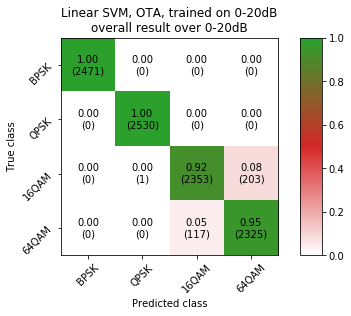

Detailed evaluation over SNR


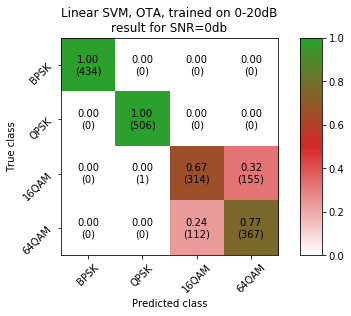

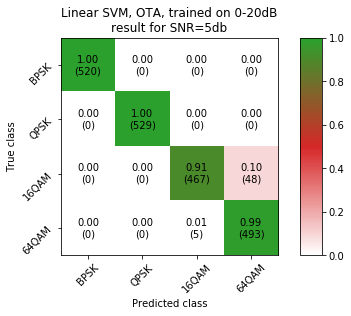

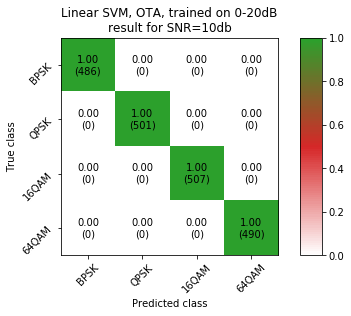

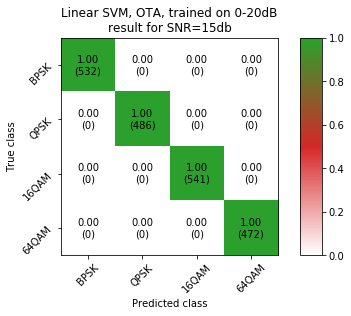

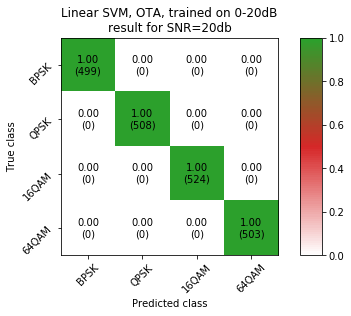

Overall evaluation score: 0.452400


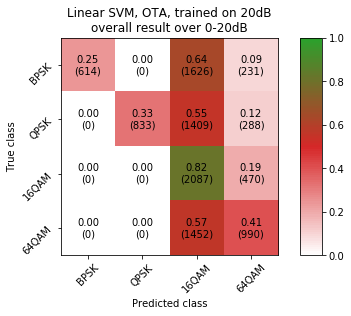

Detailed evaluation over SNR


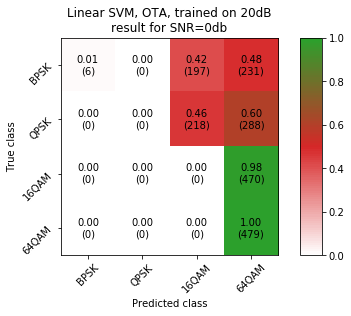

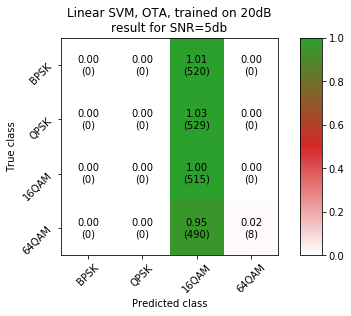

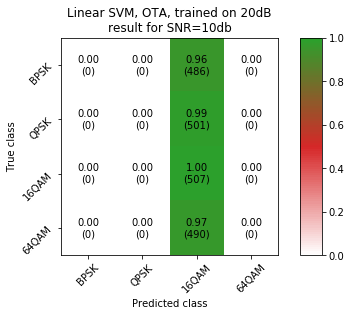

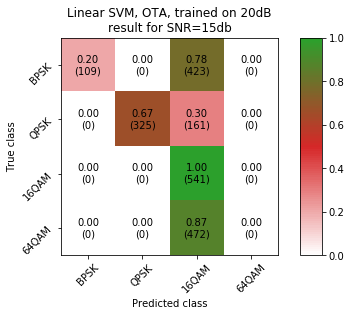

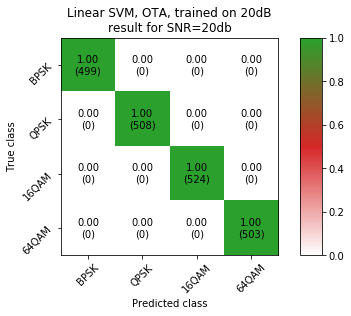

In [109]:
for svm, name in zip([lsvc_all, lsvc_20], ["0-20dB", "20dB"]):

    y_pred = svm.predict(X_test)

    print("Overall evaluation score: %f" % svm.score(X_test, y_test_values))
    conf = confusion_matrix(le.inverse_transform(y_test_values),
                            le.inverse_transform(y_pred), 
                            labels=mods)
    plot_confusion(conf, mods, "Linear SVM, OTA, trained on %s\noverall result over 0-20dB" % name)
    
    print("Detailed evaluation over SNR")
    for snr in sorted(set(y_test['snr_class']), key=lambda i: int(i[:-2])):
        _y_test_values = y_test_values[y_test['snr_class'] == snr]
        _y_pred = y_pred[y_test['snr_class'] == snr]
        conf = confusion_matrix(le.inverse_transform(_y_test_values),
                                le.inverse_transform(_y_pred), 
                                labels=mods)
        plot_confusion(conf, mods, "Linear SVM, OTA, trained on %s\nresult for SNR=%s" % (name, snr))


<hr>
# Kernel SVM
multiclass support is handled according to a one-vs-one scheme

In [ ]:
ksvc = SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, 
           shrinking=True, probability=False, tol=0.001, cache_size=200, 
           lass_weight=None, verbose=False, max_iter=-1, 
           decision_function_shape=’ovr’, random_state=None)

# decision_function(X) 	Distance of the samples X to the separating hyperplane.
# fit(X, y[, sample_weight]) 	Fit the SVM model according to the given training data.
# get_params([deep]) 	Get parameters for this estimator.
# predict(X) 	Perform classification on samples in X.
# score(X, y[, sample_weight]) 	Returns the mean accuracy on the given test data and labels.
# set_params(**params) 	Set the parameters of this estimator.

<hr>
# General proceduce

In [ ]:
# Set the parameters by cross-validation
lsvm_parameters = [
    {
        'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]
    },
]

scores = ['precision', 'recall']


clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)

clf.fit(X_train, y_train)
print(clf.best_params_)
display(pd.DataFrame(clf.cv_results_))

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

In [ ]:
##################################################
########## MAIN

if __name__ == "__main__":
    print("Hello")

In [54]:
def plot_confusion(
    matrix, 
    labels, 
    title=None,
):
    
    ### CREATE OBJECTS
    fig = plt.figure(figsize=(5, 4), facecolor='white')
    gs1 = gridspec.GridSpec(1, 11)
    ax1 = plt.subplot(gs1[0, :10])
    ax2 = plt.subplot(gs1[0, -1:])
    
    ### LET'S PLOT! 
    matrix_rel = matrix / np.sum(matrix, axis=1)
    pc = ax1.imshow(matrix_rel, interpolation='nearest', cmap=cmap_conf, vmin=0, vmax=1)

    ### ANNOTATE
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax1.annotate("%4.2f\n(%d)" % (matrix_rel[i,j], matrix[i,j]), xy=(j,i), ha="center", va="center")
    
    #ax1.annotate("t%4.2f\n(%d)" % (matrix_rel[3,2], matrix[3,2]), xy=(3,2), ha="center", va="center")
    
    
    for axis in [ax1.xaxis, ax1.yaxis]:
        axis.set_ticks(np.arange(0,len(labels)))
        axis.set_ticklabels(labels, rotation=45)
    
    ### LABELS/LEGEND
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("True class")
    cb = fig.colorbar(pc, cax=ax2)
    if(title): ax1.set_title(title)
    
    plt.show()
    

# Junk

In [ ]:
conf

# ax = plt.gca()
ax.set_xlabel("helo")